# Popular Data Science Questions
---
## Introduction
### What is this project about

In this scenario, we're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like [Dataquest](https://www.dataquest.io/). And as enthusiastic employees we've desided to scour the internet in search for the answer to the question:
* **What is it that people want to learn about in data science?**

Thinking back to our experience when we first started learning programming, it occurs to us that if we wanted to figure out what programming content to write, we could consult [Stack Overflow](https://stackoverflow.com/) and see what kind of content is more popular. We've decided to investigate Stack Overflow a little more and found out that it is part of a question and answer website network called [Stack Exchange](https://stackexchange.com/).
![Image](https://dq-content.s3.amazonaws.com/469/se_sites.png)

---

Stack Exchange hosts a huge amount of sitess on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. Just what we are looking for!
Also we can include data engineering as our point of interest. So there are some websites relevant to our goal:
* [Data Science](https://datascience.stackexchange.com/)
* [Cross Validated](https://stats.stackexchange.com/) (a statistics site)
* [Artificial Intelligence](https://ai.stackexchange.com/)
* [Mathematics](https://math.stackexchange.com/)
* [Stack Overflow](https://stackoverflow.com/) itself
* [Database Administrators](https://dba.stackexchange.com/)
* [Unix & Linux](https://unix.stackexchange.com/)
* [Software Engineering](https://softwareengineering.stackexchange.com/)

### A closer look to the Stack Exchange websites
Let's take for example **Stack Overflow** and walk through it a bit just to get you familiar with it. Another sites are similar to Stack Overflow

Basically **it is Q&A website** where everyone welcomes to ask about a wide range of topics in computer programming. If someone runs into a problem, doesn't know exactly how a particular function works, or is struggling to get their code to work they come here.

Due to issues can be related to different programming languages, there is a **tagging system** that helps filter and navigate content. Also there is a **voting system** that allows to rate best questions and answers so their authors can earn reputation points.

And finally there is a **job finding section** where you can try to get youself a new fancy job.

So the question here is the main unit followed with answer and comments. It has rating, views number and tags (usually)

![Image](https://upload.wikimedia.org/wikipedia/commons/d/dd/Stack_Overflow_Home.png)

---

### Stack Exchange Database

Stack Exchange provides a public data base for each of its websites. Here's a link to query and explore [Data Science Stack Exchange's database](https://data.stackexchange.com/datascience/query/new). It uses a Transact-SQL to write queries.

There are a lot of intresting tables like:
* Posts
* Tags
* TagSynonymous
* Comments

## First steps
### Stack Exchange Data Explorer
Stack Exchange Data Explorer or just SEDE is a great instrument so why wouldn't we use it. We can run a query right there and just download a CSV file that we'll be able to use further.

Let's start with the posts table. We'll be focusing our attention on those that seem relevant towards our goal:

* **Id**: An identification number for the post.
* **PostTypeId**: An identification number for the type of post.
* **CreationDate**: The date and time of creation of the post.
* **Score**: The post's score.
* **ViewCount**: How many times the post was viewed.
* **Tags**: What tags were used.
* **AnswerCount**: How many answers the question got.
* **FavoriteCount**: How many times the question was favored.

Also we will limit ourselves questions asked in 2019.

To get that info from the SEDE we'll run the folllowing query:
```
SELECT p.Id, pt.Name AS PostType, p.CreationDate, p.Score,
       p.ViewCount, p.Tags, p.AnswerCount, p.FavoriteCount
  FROM posts AS p
       LEFT JOIN PostTypes AS pt
       ON p.PostTypeId = pt.Id
 WHERE YEAR(CreationDate) = 2019;
```
Then we'll just download related CSV and read it to the dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

stack_2019_df = pd.read_csv("QueryResults_2019.csv")
stack_2019_df.head()

,Id,PostType,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,49302,Question,2019-04-15 04:00:33,0,1818.0,<python><statistics>,1.0,NaN
1,49303,Answer,2019-04-15 04:34:33,4,NaN,NaN,NaN,NaN
2,49304,Question,2019-04-15 05:35:40,0,123.0,<logistic-regression>,1.0,NaN
3,49305,Answer,2019-04-15 05:43:03,0,NaN,NaN,NaN,NaN
4,49306,Question,2019-04-15 06:02:12,0,172.0,<nlp><chatbot>,1.0,1.0


### Exploring and cleansing

Nowe we have familiar that we can explore. So let's see what we're dealing with!

Start with overall info.

In [2]:
stack_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             14676 non-null  int64  
 1   PostType       14676 non-null  object 
 2   CreationDate   14676 non-null  object 
 3   Score          14676 non-null  int64  
 4   ViewCount      6773 non-null   float64
 5   Tags           6773 non-null   object 
 6   AnswerCount    6773 non-null   float64
 7   FavoriteCount  1656 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 917.4+ KB


Thera are a few issues as we can see:
* `CreationDate` column isn't `datetime` type. We should fix it.
* `ViewCount`, `AnswerCount` and `FavoriteCount` columns should be `int64`.
* `ViewCount`, `AnswerCount` and `FavoriteCount` columns have a lot of missing values. We may find a way to fix it aswell.
* `Tags` column aslo has missing values but due to it's not a counting column it will not be easy to fix.

First goes first - let's deal with the `CreationDate` column.

In [3]:
stack_2019_df['CreationDate'] = pd.to_datetime(stack_2019_df['CreationDate'])
stack_2019_df['CreationDate'].head()

0   2019-04-15 04:00:33
1   2019-04-15 04:34:33
2   2019-04-15 05:35:40
3   2019-04-15 05:43:03
4   2019-04-15 06:02:12
Name: CreationDate, dtype: datetime64[ns]

It's done!

Now proceed to the next step - missing values with the counting columns.

`AnswerCount` column is appliable for questions only. It's obvious actually. Why would you answer to the another answer! There are comments for it.

And making favorite answer or comment also isn't convenient because the question is the boss here as we already know. So `FavoriteCount` column used to only question itself.

In this way all `NaN` values should be in these columns only. Let's check these columns for all non-question post types.

In [4]:
stack_2019_df.loc[stack_2019_df['PostType'] != 'Question', ['PostType', 'AnswerCount', 'FavoriteCount']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 1 to 14673
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PostType       7903 non-null   object 
 1   AnswerCount    0 non-null      float64
 2   FavoriteCount  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 247.0+ KB


Yep, all values are `NaN` in our columns like we've assumed. So it is reasonable to replace them to `0`.

Probably `ViewCount` column uses `NaN` values instead of `0`. We'll check it aswell.

In [5]:
stack_2019_df['ViewCount'].value_counts(dropna=False).sort_index()

8.0            2
9.0            5
10.0           5
11.0           9
12.0           8
            ... 
92580.0        1
106605.0       1
111240.0       1
152559.0       1
NaN         7903
Name: ViewCount, Length: 1899, dtype: int64

There is no `0` values at all so as we assumed `NaN` stands for it.

Now we can easily replace all `NaN`s with `0` and change type to the `int64` at the same time.

In [6]:
stack_2019_df[['ViewCount','AnswerCount', 'FavoriteCount']] = stack_2019_df[
    ['ViewCount', 'AnswerCount', 'FavoriteCount']].fillna(0).astype('int64')

stack_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14676 entries, 0 to 14675
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             14676 non-null  int64         
 1   PostType       14676 non-null  object        
 2   CreationDate   14676 non-null  datetime64[ns]
 3   Score          14676 non-null  int64         
 4   ViewCount      14676 non-null  int64         
 5   Tags           6773 non-null   object        
 6   AnswerCount    14676 non-null  int64         
 7   FavoriteCount  14676 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 917.4+ KB


### Tags

Now we can start cleansing probably the most important column - `Tags`. At first look there are two problems:
* Missing values
* Quite inconvinient way of storing more than two tags - `<python><statistics>`

Let's solve the second problem first. String `<python><statistics>` actually means two different tags: `python` and `stasistics`. So it seems logical to separate two tags with `,` and not with `><`. Also we don't need any extra symbols at the begining and at the end of the strings.

So let's replace all `><` with `,` and remove any single angle brackets.

In [7]:
stack_2019_df['Tags'] = stack_2019_df['Tags'].str.replace('><', ',')\
                                             .str.replace('<', '')\
                                             .str.replace('>', '')\
                                             .str.split(',')

stack_2019_df['Tags']

0                                     [python, statistics]
1                                                      NaN
2                                    [logistic-regression]
3                                                      NaN
4                                           [nlp, chatbot]
                               ...                        
14671    [python, scikit-learn, anomaly-detection, outl...
14672    [python, scikit-learn, anomaly-detection, outl...
14673                                                  NaN
14674                        [python, logistic-regression]
14675          [dataset, nlp, machine-translation, google]
Name: Tags, Length: 14676, dtype: object

Now we can go back to the missing values.

I think missing values here stand for `0` so these posts just do not have any tags. We can easily replace `NaN` with `No tags` like we did before.

In [8]:
stack_2019_df['Tags'].fillna("No tags", inplace=True)
stack_2019_df['Tags']

0                                     [python, statistics]
1                                                  No tags
2                                    [logistic-regression]
3                                                  No tags
4                                           [nlp, chatbot]
                               ...                        
14671    [python, scikit-learn, anomaly-detection, outl...
14672    [python, scikit-learn, anomaly-detection, outl...
14673                                              No tags
14674                        [python, logistic-regression]
14675          [dataset, nlp, machine-translation, google]
Name: Tags, Length: 14676, dtype: object

## Time for analysys

### Tags count

So far we have clean and preaty dataframe which means we are free to start some analysys. But first let me remind our main question:
* **What is it that people want to learn about in data science?**

The best way to answer to this question is using **tags** because each tag is like a short questions topic. But these is still one problem - we have strings with multiply tags. Fortunately we can split them using `,` as delimiter.

In [9]:
tags_df = stack_2019_df['Tags'].apply(pd.Series)
tags_df

,0,1,2,3,4
0,python,statistics,NaN,NaN,NaN
1,No tags,NaN,NaN,NaN,NaN
2,logistic-regression,NaN,NaN,NaN,NaN
3,No tags,NaN,NaN,NaN,NaN
4,nlp,chatbot,NaN,NaN,NaN
...,...,...,...,...,...
14671,python,scikit-learn,anomaly-detection,outlier,data-imputation
14672,python,scikit-learn,anomaly-detection,outlier,NaN
14673,No tags,NaN,NaN,NaN,NaN
14674,python,logistic-regression,NaN,NaN,NaN


Now we only have to combine all columns and drop `NaN` values.

In [10]:
tags = tags_df[0]

for i in range(1,5):
    tags = pd.concat([tags, tags_df[i]])

tags.dropna(inplace=True)
tags.reset_index(drop=True, inplace=True)

tags

0                       python
1                      No tags
2          logistic-regression
3                      No tags
4                          nlp
                 ...          
28431          word-embeddings
28432      predictive-modeling
28433                  smotenc
28434    unsupervised-learning
28435          data-imputation
Length: 28436, dtype: object

We've got series that contains separated tags. With that we can find how many times each tag was used.

In [11]:
#Create df for most used tags exclude "No tags"
top_tags = tags.value_counts().to_frame()
top_tags.drop('No tags', inplace=True)
top_tags.columns = ['Uses']

Now we'll build bar plot for tags and uses. Let's check **top 10** for example.

Text(0.5, 1.0, 'Top 10 used tags')

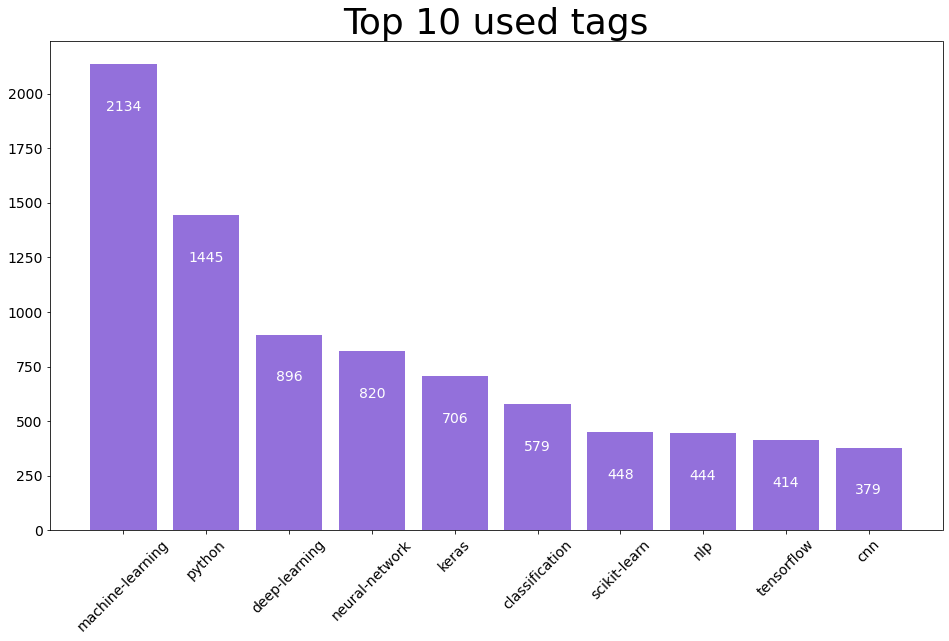

In [12]:
#Simple bar plot for uses
%matplotlib inline
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(top_tags.index[:10],
       top_tags.iloc[:10, 0],
       color="mediumpurple")

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

def set_annotations(ax, df_column):
    #Make annotation with value for bar plot
    for i, uses in enumerate(df_column):
        ax.text(i, uses - 0.1 * df_column.iloc[0], uses,
                horizontalalignment='center', fontsize=14, color="white")
        
set_annotations(ax, top_tags.Uses[:10])

plt.title("Top 10 used tags", fontsize=36)

Okay, we have the most used tags top. Our current leader is **machine-learning** tag with **2134** uses. But there can be one tricky problem. 
>What if posts with these tags have never been seen and answered? 


### Checking views and answers
According to our last assumption it would be unwise not to check how many views or answers do these posts have. Let's add these metrics to `top_tags` dataframe.

In [13]:
# Iterate for each tag from top_tags
for tag in top_tags.index:
    #Mask for posts with current tag selection
    mask = stack_2019_df['Tags'].apply(lambda x: True if tag in x else False)
    
    tag_views = stack_2019_df.loc[mask, 'ViewCount'].sum()#Views for current tag
    tag_answers = stack_2019_df.loc[mask, 'AnswerCount'].sum()#Answers for current tag
    
    top_tags.loc[tag, 'Views'] = tag_views
    top_tags.loc[tag, 'Answers'] = tag_answers

top_tags[['Views', 'Answers']] = top_tags[
                                 ['Views','Answers']].astype('int64')
    
top_tags.head()

,Uses,Views,Answers
machine-learning,2134,1586378,2542
python,1445,2431941,1655
deep-learning,896,907840,1003
neural-network,820,790461,918
keras,706,1022784,733


Now we can build plot for views and answers aswell.

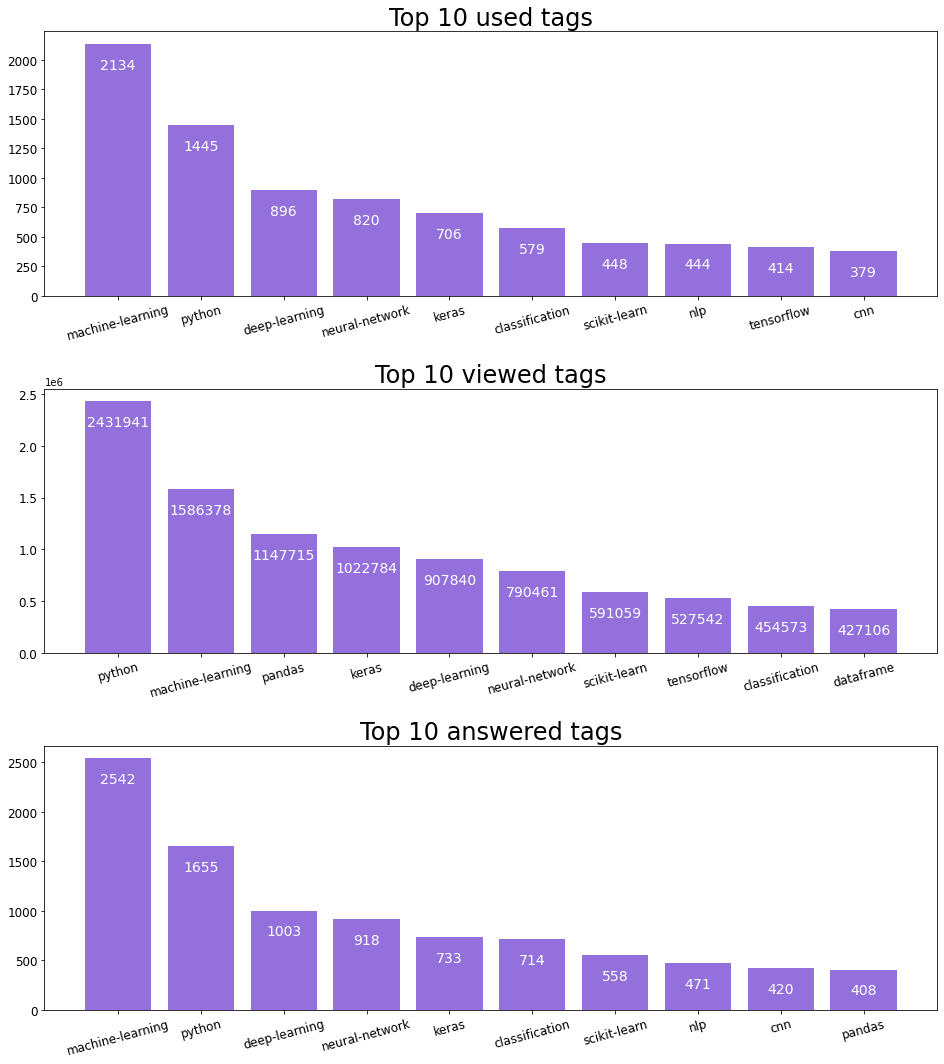

In [14]:
fig, axs = plt.subplots(3, figsize=(16,18))

x = 10 #how many tags will be in the top 

#Plot for uses
axs[0].bar(top_tags.index[:x],
           top_tags.iloc[:x, 0],
           color="mediumpurple")

axs[0].set_title("Top {} used tags".format(x), fontsize=24)
set_annotations(axs[0], top_tags.Uses[:x])

#Plot for views
top_tags.sort_values(by='Views', ascending=False, inplace=True)

axs[1].bar(top_tags.index[:x],
           top_tags.iloc[:x, 1],
           color="mediumpurple")

axs[1].set_title("Top {} viewed tags".format(x), fontsize=24)
set_annotations(axs[1], top_tags.Views[:x])

#Plot for answers
top_tags.sort_values(by='Answers', ascending=False, inplace=True)

axs[2].bar(top_tags.index[:x],
           top_tags.iloc[:x, 2],
           color="mediumpurple")

axs[2].set_title("Top {} answered tags".format(x), fontsize=24)
set_annotations(axs[2], top_tags.Answers[:x])

plt.subplots_adjust(hspace = 0.35) #Separating subplots

for i in range(0,3):
    axs[i].tick_params(axis='x', labelsize=12, rotation=15)
    axs[i].tick_params(axis='y', labelsize=12)

We've got our plots! Now we can clearly see that some tags are popular according to different metrics. For example **machine-learning** and **python** tags split first two places in all tops.

But there are some tags that appear in some tops only. **Dataframe** tag is one of them and probably not so interesting to analyse. Also that kind of tags can be used with any tag. Tag **python** is applicable to almost any other tag, like **machine-learning,scikit-learn,python**.

Also some tags are related to each other. To get more info about tags we use [tags page](https://datascience.stackexchange.com/tags) on DSSE. Let's take **machine-learning** and look at some related tags:
* **deep-learnig** - new area of machine Learning research
* **neural-network** - programming constructs that mimic the properties of biological neurons
* **cnn** - convolutional neural networks used for classification tasks and image recognition
* **tesorflow** - open source library for machine learning
* **keras** - open-source deep learning API
* **scikit-learn** - popular machine learning package for Python
* **classification** - one of the main machine learning tasks
* **nlp** - natural language processing is a field of computer science concerned with the interactions between computers and human languages

And we can continue this list. There is no doubts that **machine learning** is really popular theme but it's like **python** it could represent a lot of different areas of data science like we see above. Let's try be more specific and pick some other tag.

Excluding **machine-learning** and **python** we see that next most popular tag is **deep-learning**:
* **top 3** by uses and answers
* **top 5** by views

Also we have closely related tags in our plot like **neural-network** and **keras**.

### Deep learning across the years

We can be pretty sure that **deep learning** was really popular in 2019. But we want to find theme that would be popular as long as possible. For that purpose let's get extanded dataset from the [SEDE](https://data.stackexchange.com/datascience/query/new) using simle query:

```
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
```

Then read downloaded csv into dataframe.

In [15]:
stack_all_df = pd.read_csv("QueryResults_all.csv", parse_dates=["CreationDate"])
stack_all_df.head(10)

,Id,CreationDate,Tags
0,85426,2020-11-14 20:04:19,<machine-learning><neural-network><hyperparame...
1,85433,2020-11-14 22:29:19,<neural-network><rnn><gradient-descent><optimi...
2,85435,2020-11-15 00:17:00,<statistics><multiclass-classification><perfor...
3,85437,2020-11-15 02:45:16,<neural-network><multilabel-classification>
4,85438,2020-11-15 05:26:08,<linear-regression><k-means>
5,85439,2020-11-15 07:24:21,<recommender-system>
6,85441,2020-11-15 11:29:38,<machine-learning><python><classification><log...
7,85442,2020-11-15 12:14:51,<python><deep-learning><keras><tensorflow><cnn>
8,85443,2020-11-15 13:43:43,<machine-learning><machine-learning-model>
9,85447,2020-11-15 15:36:00,<deep-learning><tensorflow><lstm><pooling>


Let's repeat the tags column transformation like we did before.

In [16]:
stack_all_df['Tags'] = stack_all_df['Tags'].str.replace('><', ',')\
                                             .str.replace('<', '')\
                                             .str.replace('>', '')\
                                             .str.split(',')

stack_all_df['Tags']

0        [machine-learning, neural-network, hyperparame...
1        [neural-network, rnn, gradient-descent, optimi...
2        [statistics, multiclass-classification, perfor...
3              [neural-network, multilabel-classification]
4                             [linear-regression, k-means]
                               ...                        
29361    [cosine-distance, similar-documents, semantic-...
29362    [deep-learning, classification, keras, tensorf...
29363                  [machine-learning, python, jupyter]
29364               [machine-learning, python, nlp, spacy]
29365                  [classification, feature-selection]
Name: Tags, Length: 29366, dtype: object

Before we'll start counting tags let's make some assumption. We'll classify as **deep learning** questions those that have one of the following tags:
* **deep-learnig**
* **neural-network**
* **cnn**
* **keras**

So we'll replace any tags from above to `deep-learning` fro proper futher counting.

In [17]:
#Deep learning related tags
dl_tags = ['deep-learning', 'neural-network', 'cnn', 'keras']

def make_dl_tag(tag_list):
    #Change tag to deep-learning if question has specific tags
    #from dl_tags list
    
    for tag in tag_list:
        #Iterate for each tag in current question
        if tag in dl_tags:
            #If in the list - return deep-learning
            tag_list = ['deep-learning']
            return tag_list
        
    return tag_list

#Use function
stack_all_df['Tags'] = stack_all_df['Tags'].apply(make_dl_tag)

stack_all_df['Tags']

0                                          [deep-learning]
1                                          [deep-learning]
2        [statistics, multiclass-classification, perfor...
3                                          [deep-learning]
4                             [linear-regression, k-means]
                               ...                        
29361    [cosine-distance, similar-documents, semantic-...
29362                                      [deep-learning]
29363                  [machine-learning, python, jupyter]
29364               [machine-learning, python, nlp, spacy]
29365                  [classification, feature-selection]
Name: Tags, Length: 29366, dtype: object

In [18]:
stack_all_df['CreationDate'].min()

Timestamp('2014-05-13 23:58:30')

That's done. But we should make one more thing. As we want relevant results for better recomadation we'll use fresh data. Let's work with question from 2017 to nowadays.

In [20]:
#Create column with year and month only
stack_all_df['quarter_month'] = stack_all_df['CreationDate'].dt.to_period('Q')

print('Quarter-month for all posts:\n', stack_all_df['quarter_month'].unique())

#Keep only 2019-2021 posts
stack_17_21 = stack_all_df[stack_all_df['quarter_month'] >= '2017-1']

print('\nQuarter-month for 2019-2021 posts:\n', stack_17_21['quarter_month'].unique())

Quarter-month for all posts:
 <PeriodArray>
['2020Q4', '2019Q2', '2018Q4', '2014Q3', '2016Q4', '2019Q4', '2018Q1',
 '2020Q2', '2018Q3', '2014Q4', '2015Q1', '2017Q1', '2015Q2', '2021Q1',
 '2018Q2', '2015Q3', '2017Q2', '2020Q1', '2019Q1', '2015Q4', '2016Q3',
 '2014Q2', '2019Q3', '2020Q3', '2016Q1', '2017Q3', '2016Q2', '2021Q2',
 '2017Q4']
Length: 29, dtype: period[Q-DEC]

Quarter-month for 2019-2021 posts:
 <PeriodArray>
['2020Q4', '2019Q2', '2018Q4', '2019Q4', '2018Q1', '2020Q2', '2018Q3',
 '2017Q1', '2021Q1', '2018Q2', '2017Q2', '2020Q1', '2019Q1', '2019Q3',
 '2020Q3', '2017Q3', '2021Q2', '2017Q4']
Length: 18, dtype: period[Q-DEC]


Now let's compute some stuff:
* How many questions were asked during the period
* How many deep learning questions were asked during the period
* Percentage of deep learning questions asked during the period

In [21]:
#Deep learning mask for questions
dl_mask = stack_17_21['Tags'].apply(lambda x: True if x == ['deep-learning'] else False)

#Total amount of questions
total_questions = stack_17_21.shape[0]

#Amount of DL questions
dl_questions = stack_17_21[dl_mask].shape[0]

print('Total questions asked: ', total_questions,
     '\nDeep learnig questions asked: ', dl_questions,
     '\nPersentage of deep learning questionds: {:.2%}'\
      .format(dl_questions/total_questions))

Total questions asked:  25530 
Deep learnig questions asked:  7665 
Persentage of deep learning questionds: 30.02%


For whole period was asked about **30%** deep learning questions. It is a lot!

Let's build a plot to see dynamic changes for deep learning questions.

In [23]:
#Create df with amount of tags grouped by year_month
tags_dyn = stack_17_21[['quarter_month', 'Tags']].groupby('quarter_month')\
                                              .count().reset_index()

#Add column with amount of DL tags grouped by year_month
tags_dyn['Dl tags'] = stack_17_21.loc[dl_mask, ['quarter_month', 'Tags']]\
                      .groupby('quarter_month').count().reset_index()['Tags']

#Add DL percentage
tags_dyn['Dl percentage'] = tags_dyn['Dl tags'] / tags_dyn['Tags']

#Transform year_month to string
tags_dyn['quarter_month'] = tags_dyn['quarter_month'].astype('str')

tags_dyn.head()

,quarter_month,Tags,Dl tags,Dl percentage
0,2017Q1,690,190,0.275362
1,2017Q2,633,169,0.266983
2,2017Q3,707,188,0.265912
3,2017Q4,888,270,0.304054
4,2018Q1,1200,423,0.352500


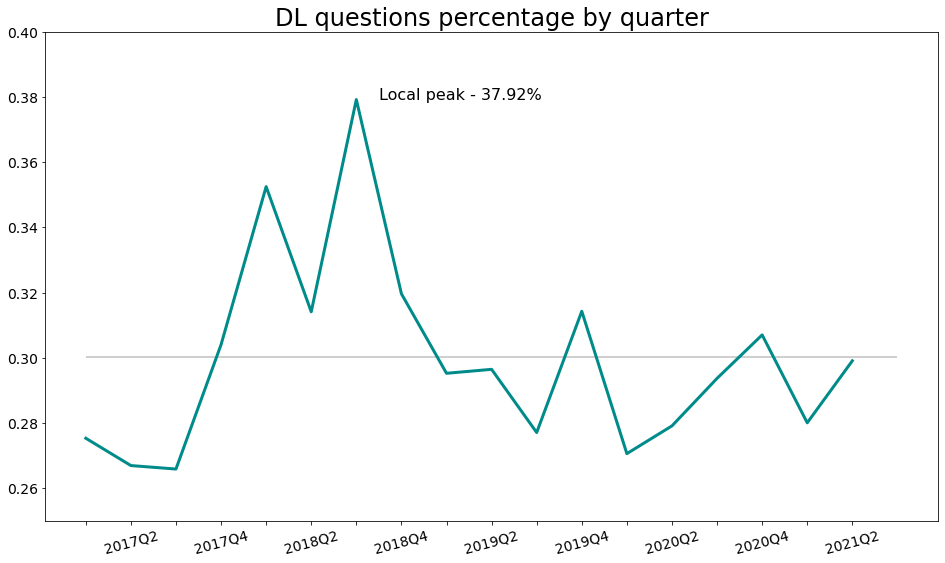

In [43]:
# Draw Plot 
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(tags_dyn['quarter_month'],
        tags_dyn['Dl percentage'],
        color='darkcyan',
        linewidth=3)

#Mean percentage line
plt.hlines(y=dl_questions/total_questions, 
           xmin=0, 
           xmax=len(tags_dyn),
           color='gray',
           alpha=0.5
           )

#Decorations
ax.set_title('DL questions percentage by quarter', fontsize=24)
ax.tick_params(axis='x', labelsize=14, rotation=15)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylim(0.25, 0.40)

#Mark for maximum
ax.text(tags_dyn['Dl percentage'].idxmax()+0.5,
        tags_dyn['Dl percentage'].max(),
        'Local peak - {:.2%}'.format(tags_dyn['Dl percentage'].max()),
        horizontalalignment='left',
        fontsize=16, color="black")

#Hiding ticks
for i, tick in enumerate(ax.xaxis.get_ticklabels()):
    if i % 2 == 0:
        tick.set_visible(False)

Now we can that deep learning questions were even more popular in the **third quarter of 2018** - almost **38%** percents of all questions related to DL.

After that percentage fluctuates about solid **30%**. Also now it has an local uptrend.

## Conclusion

In this project we tried to answer to one simlpe question:
* **What is it that people want to learn about in data science?**

Right anwer would help our company to create relevant data science content like books, videos etc. We used [Data Science Stack Exchange's database](https://data.stackexchange.com/datascience/query/new) to get info about stuff people asking about on the [Data Science](https://datascience.stackexchange.com/).

We used tags to determine most post popular questions. With tags we used some metrics from dataset:
* Tag uses
* Question views
* Questions answers

Сonsidering these metrics,we came to the conclusion that **deep learning** questions is the most popular. From 2017 about **30%** of all questions was related to the DL. Also deep learning has become the dominant approach for much ongoing work in the field of machine learning at of 2020 according to the [Wikipedia](https://en.wikipedia.org/wiki/Machine_learning).

Besides deep learning itself there are some closely connected themes:
* **neural network**
* **cnn**
* **keras** and more

So we recommend our company to make deep learning content. It looks promising.

### Way forward

We can analyse data from other data science related sites that we listed in the introduction. Like [Artificial Intelligence](https://ai.stackexchange.com/) of [Stack Overflow](https://stackoverflow.com/) itself.

Probably we can find some interesting insights there aswell.